<a href="https://colab.research.google.com/github/MarcosMurguel/RedesNeurais_MorfologiaMatematica/blob/main/Morfologia_Matem%C3%A1tica_e_Redes_Neurais_Morfol%C3%B3gicas_Implementadas_no_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto: Morfologia Matemática e Redes Neurais Morfológicas Implementadas no TensorFlow

Esse algorítmo foi desenvolvido por mim, Marcos Murguel$^{1}$ em apr/2022, a partir de um projeto de Iniciação Cientifica (IC) orientada pelo Prof. Dr. Marcos Eduardo Valle$^{2}$ com fomento público pelo Conselho Nacional de Desenvolvimento Científico e Tecnológico (CNPQ). O projeto geral permeia a área de Inteligência Artificial para Processamento Digital de Imagens. Neste projeto, em suma$^{3}$, me dediquei em estudar:  

*   Teoria dos conjuntos;
*   Erosão e Dilatação binária;
*   Erosão e Dilatação em tons de cinza;
*   Estrutura de um Neurônio Artificial;
*   Gradiente Descendente;
*   Redes Neurais (Perceptron e Convolucional);
*   Aplicação Computacional em Python;
*   Divisão entre treino e teste;
*   Avaliação de Modelos de Classificação.




## 1) Técnologias e conhecimentos utilizados no projeto:

*   Aprendizado de máquina supervisionado;
*   Modelo de Classificação;
*   Google Colab;
*   Python;
*   Scikit-Learn;
*   Numpy;
*   Pandas;
*   Matplotlib.

##2) Objetivo do projeto.
Implementar e testar uma Rede Neural Morfológica utilizando conhecimentos da teoria de Morfologia Matemática.

## 3)Conhecimento Teórico Necessário.
### 3.1) Erosão e Dilatação.
Dados um função $f$ e um elemento estruturante $g$, a erosão de $f$ por $g$ é definida por:
\begin{equation}
    \left(f \ominus g \right) \left(x\right) = \max \left\{y : g_x + y \leq f \right\}.
\end{equation}
Podemos reescrever a **Erosão** como uma subtração de Minkowviski. Usando o símbolo $\land$ para denotar o ínfimo, temos:
\begin{equation}
    f \ominus g = \bigwedge_{x \in D} (f_{-x} - g(x))
\end{equation}

De forma análoga, dados uma função $f$ e um elemento estruturante $g$, a **Dilatação** de $f$ por $g$ é definida por:
\begin{equation}
    \left(f \oplus g \right) \left(x\right) = \min \left\{y : -\check{g}_x + y \geq f \right\}.
\end{equation}
Também podemos reescrever a \textit{dilatação} como uma soma de Minkowviski. Usando o símbolo $\vee$ para denotar o supremo, temos:
\begin{equation}
    f \oplus g = \bigvee_{x \in D} \big(f_x + g(x) \big)
\end{equation}

### 3.2) Neurônios Artificiais e Potêncial de Ativação.

Os neurônios são as unidades básicas de processamento de uma rede neural artificial. Existe na literatura diferentes forma de descrever um neurônio artificial, incluindo os neurônios tradicionais e os neurônios morfológicos. A arquitetura da rede descreve a interação entre os neurônios da rede. Finalmente, a regra de aprendizado corresponde à forma como os parâmetros livres são ajustados para que a rede realize uma certa tarefa. Iniciamos nossos estudos das redes neurais artificiais com o modelo do neurônio. Na sequência, apresentamos o neurônio tradicional e o neurônio morfológico.

Dadas as entradas $\left[x_1, x_2, x_3, \ldots, x_n \right]$, os pesos $\left[w_{1}, w_{2}, w_{3}, \ldots, w_{n} \right]$ e o bias $b$, podemos escrever o *potencial de ativação* $v$ de um neurônio tradicional por
\begin{equation}
    v = \sum_{j=1}^n w_{j} x_{j} + b.
\end{equation}
Dada uma função de ativação $\phi:\mathbb{R} \to \mathbb{R}$, a saída do neurônio tradicional é dada por:
\begin{equation}
     y = \phi(v).
\end{equation}
A função de ativação $\phi$ desempenha um papel matemático importante introduzindo uma possível não-linearidade no modelo do neurônio. Exemplos de funções de ativação incluem a função logística e a função de ativação *relu* (abreviação de *rectified linear unit*).

Diferente do modelo tradicional, podemos escrever o potencial de ativação de um neurônio morfológico matematicamente por:
\begin{equation}
    v =  \max_{j=1,\ldots,n} \{w_{j} + x_j\}  \iff  v = \bigvee_{j=1}^{n}  \{w_{j} + x_j\},
\end{equation}
ou
\begin{equation}
    v =  \min_{j=1,\ldots,n} \{w_{j} + x_j\}  \iff  v = \bigwedge_{j=1}^{n}  \{w_{j} + x_j\}.
\end{equation}
Pode-se mostrar que primeira e a segunda equação realizam uma operação de dilatação e erosão da morfologia matemática em tons de cinza, respectivamente.

##4) Conquistas:

*   Projeto final apresentado no XXX Congresso de Iniciação Cientifica da Unicamp;
*   Conquista de mais um projeto$^{4}$ intitulado "Redes Neurais Profundas Aplicadas no Diagnóstico de Leucemia Linfoblástica Aguda" com base neste perído de dedicação.

$^{1}$ Graduando em Matemática pelo Instituto de Matemática, Estatística e Computação Científica - Unicamp.

$^{2}$ Professor pelo Instituto de Matemática, Estatística e Computação Científica - Unicamp.

$^{3}$ Para ter acesso a todo o projeto, com toda argumentação teórica, veja este [reposítorio](https://).

$^{4}$ Para ter acesso ao novo projeto, veja este [reposítorio](https://).

## 5) Implementação do Projeto e aplicação nos conjuntos de dados [Make Moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) e [Breast Cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

### 5.1) Carregando as Bibliotecas.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_moons, load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Layer
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from re import VERBOSE
import os

### 5.2) Carregando e plotando um conjunto de dados artificial chamado Make Moons, que formam duas luas como a imagem a seguir evidencia. Veja que este problema não é, de forma mais otimizada, linearmente resolvível. Perceba que este é um exemplo de classificação binária, onde pertencemos a classe roxa ou a classe amarela.

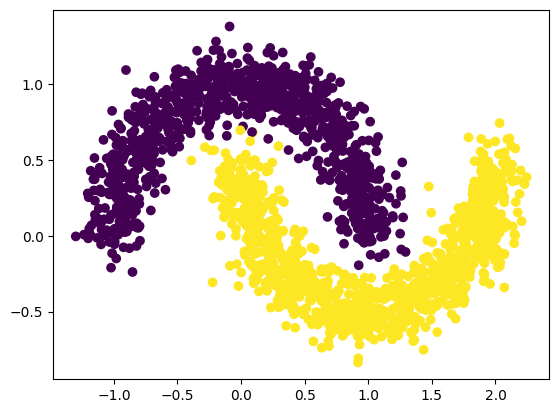

In [49]:
X_moons, Y_moons = make_moons(n_samples=2000, noise=0.12);
plt.scatter(X_moons[:,0],X_moons[:,1],c=Y_moons);

### 5.3) Carregando um conjunto de dados chamado load_breast_cancer. Este é um dataset que contém dados de pacientes, nosso objetivo é aferir se um paciênte X tera, ou não, câncer dado as nossas variáveis independentes. Assim como nosso problema anterior, aqui temos um caso de classficação binária, onde o paciente X tem ou não tem câncer.

In [3]:
X_cancer, Y_cancer = load_breast_cancer(return_X_y=True)

### 5.4) Criando nossa Camada de Dilatação, chamada de DilationLayer. Veja que assim como na teoria, aqui pegamos o valor máximo da soma de $w_j$ e $x_j$.

\begin{equation}
    v =  \max_{j=1,\ldots,n} \{w_{j} + x_j\}  \iff  v = \bigvee_{j=1}^{n}  \{w_{j} + x_j\},
\end{equation}


In [4]:
class DilationLayer(Layer):
    def __init__(self, neuronios=1):
        super(DilationLayer, self).__init__()
        self.units = neuronios

    def build(self, input_shape):
            w_init = tf.random_uniform_initializer(minval=-1, maxval=1)
            self.w = tf.Variable(initial_value=w_init(shape=(self.units, input_shape[-1])),trainable=True)

    def call(self, inputs):
        return tf.stack([tf.reduce_max(tf.add(inputs,self.w[i]),axis=1) for i in range(self.units)], axis=1) #retorna o máximo da soma de w_j e x_j.

### 5.5) De maneira análoga, criamos nossa Camada de Erosão, chamada de ErosionLayer. Veja que assim como na teoria, aqui pegamos o valor mínimo da soma de $w_j$ e $x_j$.

\begin{equation}
    v =  \min_{j=1,\ldots,n} \{w_{j} + x_j\}  \iff  v = \bigwedge_{j=1}^{n}  \{w_{j} + x_j\}.
\end{equation}

In [5]:
class ErosionLayer(Layer):
    def __init__(self, neuronios=1):
        super(ErosionLayer, self).__init__()
        self.units = neuronios

    def build(self, input_shape):
            w_init = tf.random_uniform_initializer(minval=-1, maxval=1)
            self.w = tf.Variable(initial_value=w_init(shape=(self.units, input_shape[-1])),trainable=True)

    def call(self, inputs):
        return tf.stack([tf.reduce_min(tf.add(inputs,self.w[i]),axis=1) for i in range(self.units)], axis=1) #retorna o mínimo da soma de w_j e x_j.

### 5.5) Criando uma função myscore que devolve a acurácia do modelo.


In [6]:
def myscore(clf,X,y):
  return accuracy_score(y,clf.predict(X))

### 5.6) Criando uma rede neural com os conceitos da **Erosion Layer**, aqui temos a aplicação do modelo matemático calculado anteriormente. Testamos também sua acurácia, afim de termos uma métrica de comparação entre os modelos.

In [7]:
class MorphNetErosion():
    def __init__(self, Neuronios = 10):
        self.N = Neuronios

    def fit(self,X,Y,epochs = 100):
        self.clf = Sequential([ErosionLayer(self.N),Dense(1)])
        self.clf.compile(optimizer="Adam",loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))
        self.clf.fit(X,Y,epochs=epochs)

    def predict(self,X):
        return self.clf.predict(X) >= 0

In [ ]:
clf_erosion = MorphNetErosion()
clf_erosion.fit(X_moons,Y_moons,200);
Ypred = clf_erosion.predict(X_moons);

In [56]:
score_erosion = myscore(clf_erosion,X_moons,Y_moons)
print(f'A acurácia do modelo que utiliza apenas a erosão como construção teórica está em {round(score_erosion*100,2)}%')

63/63 [==============================] - 0s 4ms/step
A acurácia do modelo que utiliza apenas a erosão como construção teórica está em 90.5%


In [10]:
print(classification_report(Y_moons,clf_erosion.predict(X_moons)))

63/63 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1000
           1       0.94      0.93      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



25000/25000 [==============================] - 54s 2ms/step


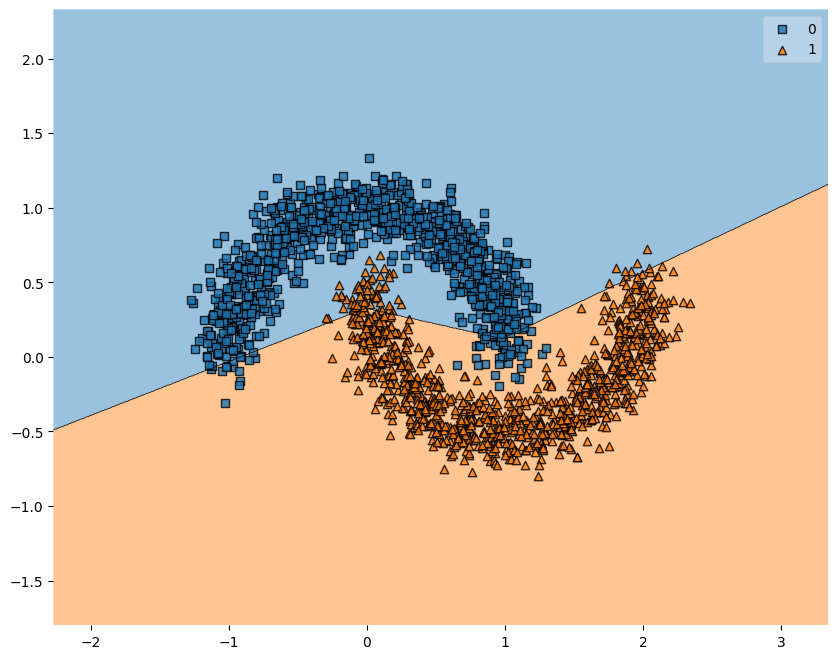

In [11]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_moons,Y_moons,clf = clf_erosion);

In [ ]:
clf_erosion_4cancer = MorphNetErosion()
clf_erosion_4cancer.fit(X_cancer,Y_cancer,200);
Ypred = clf_erosion_4cancer.predict(X_cancer);

In [13]:
score_erosion_4cancer = myscore(clf_erosion_4cancer,X_cancer,Y_cancer)
print(f'A acurácia do modelo que utiliza apenas a diltação como construção teórica está em {round(score_erosion_4cancer*100,2)}%')

18/18 [==============================] - 0s 2ms/step
A acurácia do modelo que utiliza apenas a diltação como construção teórica está em 86.47%


In [14]:
print(classification_report(Y_cancer,clf_erosion_4cancer.predict(X_cancer)))

18/18 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       212
           1       0.84      0.97      0.90       357

    accuracy                           0.86       569
   macro avg       0.88      0.83      0.85       569
weighted avg       0.87      0.86      0.86       569



### 5.7) Criando uma rede neural com os conceitos da **Dilation Layer**, aqui temos a aplicação do modelo matemático calculado anteriormente. Testamos também sua acurácia, afim de termos uma métrica de comparação entre os modelos.

In [15]:
class MorphNetDilation():
    def __init__(self, Neuronios = 10):
        self.N = Neuronios

    def fit(self,X,Y,epochs = 100):
        self.clf = Sequential([DilationLayer(self.N),Dense(1)])
        self.clf.compile(optimizer="Adam",loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))
        self.clf.fit(X,Y,epochs=epochs)

    def predict(self,X):
        return self.clf.predict(X) >= 0

In [ ]:
clf_dilation = MorphNetDilation()
clf_dilation.fit(X_moons,Y_moons,200);
Ypred = clf_dilation.predict(X_moons);

In [17]:
score_dilation = myscore(clf_dilation,X_moons,Y_moons)
print(f'A acurácia do modelo que utiliza apenas a diltação como construção teórica está em {round(score_dilation*100,2)}%')

63/63 [==============================] - 0s 2ms/step
A acurácia do modelo que utiliza apenas a diltação como construção teórica está em 92.1%


In [18]:
print(classification_report(Y_moons,clf_dilation.predict(X_moons)))

63/63 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1000
           1       0.92      0.92      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



25000/25000 [==============================] - 51s 2ms/step


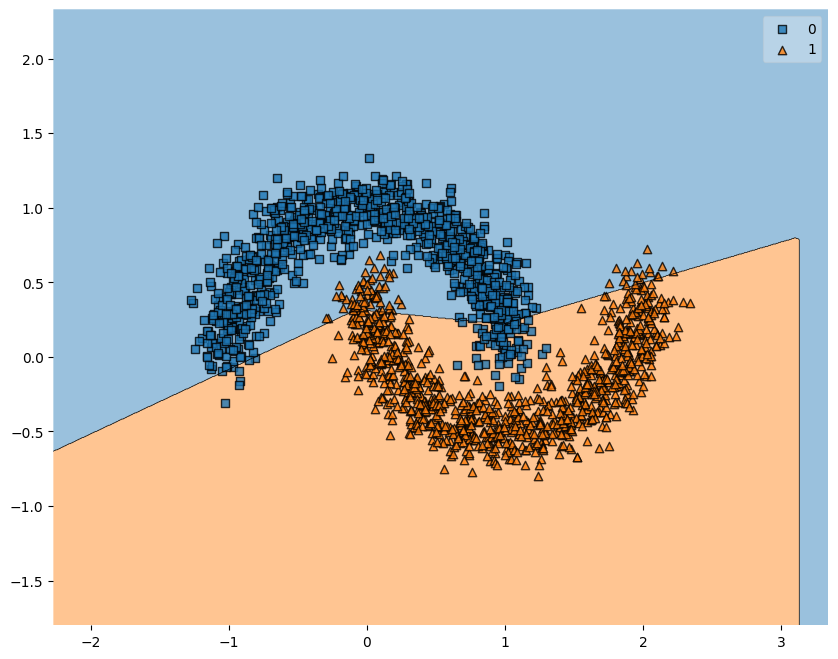

In [19]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_moons,Y_moons,clf = clf_dilation);

In [ ]:
clf_dilation_4cancer = MorphNetDilation()
clf_dilation_4cancer.fit(X_cancer,Y_cancer,200);
Ypred = clf_dilation_4cancer.predict(X_cancer);

In [21]:
score_dilation_4cancer = myscore(clf_dilation_4cancer,X_cancer,Y_cancer)
print(f'A acurácia do modelo que utiliza apenas a diltação como construção teórica está em {round(score_dilation_4cancer*100,2)}%')

18/18 [==============================] - 0s 2ms/step
A acurácia do modelo que utiliza apenas a diltação como construção teórica está em 90.86%


In [22]:
print(classification_report(Y_cancer,clf_dilation_4cancer.predict(X_cancer)))

18/18 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       212
           1       0.89      0.98      0.93       357

    accuracy                           0.91       569
   macro avg       0.92      0.88      0.90       569
weighted avg       0.91      0.91      0.91       569



### 5.8) Criando uma rede neural com os conceitos tanto da **Dilation Layer** quanto da **Erosion Layer**, aqui temos a aplicação dos modelos matemáticos calculados anteriormente. Testamos também sua acurácia, afim de termos uma métrica de comparação entre os modelos.

In [23]:
class MorphNet():
    def __init__(self, Neuronios = 10):
        self.N = Neuronios

    def fit(self,X,Y,epochs = 100):
        self.clf = Sequential([ErosionLayer(self.N),DilationLayer(self.N),Dense(1)])
        self.clf.compile(optimizer="Adam",loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))
        self.clf.fit(X,Y,epochs=epochs)

    def predict(self,X):
        return self.clf.predict(X) >= 0

In [ ]:
clf_both = MorphNet()
clf_both.fit(X_moons,Y_moons,200);
Ypred = clf_both.predict(X_moons);

In [25]:
score_both = myscore(clf_both,X_moons,Y_moons)
print(f'A acurácia do modelo que utiliza ambas operações como construção teórica está em {round(score_dilation*100,2)}%')

63/63 [==============================] - 0s 3ms/step
A acurácia do modelo que utiliza ambas operações como construção teórica está em 92.1%


In [26]:
print(classification_report(Y_moons,clf_both.predict(X_moons)))

63/63 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1000
           1       0.97      0.96      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



25000/25000 [==============================] - 58s 2ms/step


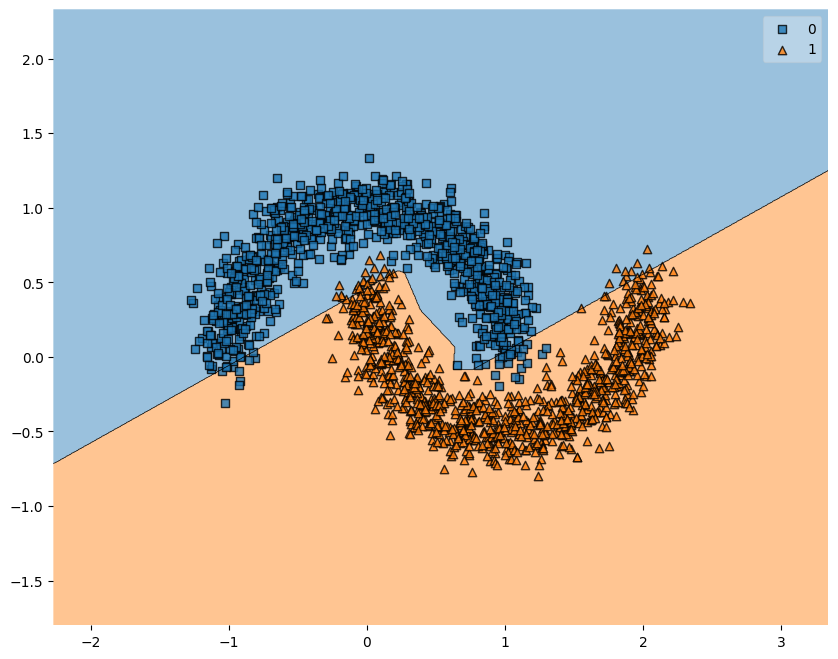

In [27]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_moons,Y_moons,clf = clf_both);

In [ ]:
clf_both_4cancer = MorphNet()
clf_both_4cancer.fit(X_cancer,Y_cancer,200);
Ypred = clf_both_4cancer.predict(X_cancer);

In [29]:
score_both_4cancer = myscore(clf_both_4cancer,X_cancer,Y_cancer)
print(f' acurácia do modelo que utiliza ambas operações como construção teórica está em {round(score_both_4cancer*100,2)}%')

18/18 [==============================] - 0s 4ms/step
 acurácia do modelo que utiliza ambas operações como construção teórica está em 72.93%


In [30]:
print(classification_report(Y_cancer,clf_both_4cancer.predict(X_cancer)))

18/18 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.30      0.45       212
           1       0.70      0.98      0.82       357

    accuracy                           0.73       569
   macro avg       0.81      0.64      0.64       569
weighted avg       0.78      0.73      0.68       569



### 5.9) Utilizando a técnica de divisão StratifiedKFold que consiste em pegar um dataset dividir em k partes balanceando nossos rótulos, utilizando $k-1$ partes para treino e uma $k-(k-1)$ partes para teste.

In [ ]:
kf = StratifiedKFold(n_splits=5)
for ind_tr, ind_te in kf.split(range(X_moons.shape[0]), Y_moons):
  Xtr = X_moons[ind_tr,:]
  Ytr = Y_moons[ind_tr]
  Xte = X_moons[ind_te,:]
  Yte = Y_moons[ind_te]
  clf_kfold = MorphNet()
  clf_kfold.fit(Xtr,Ytr,200)
  print(accuracy_score(Yte,clf_kfold.predict(Xte)))

25000/25000 [==============================] - 57s 2ms/step


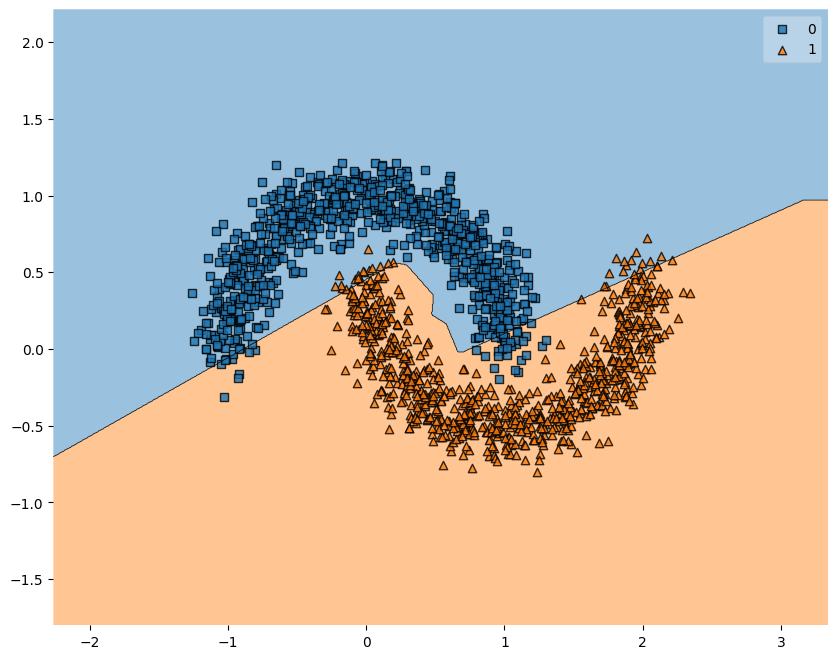

In [32]:
plt.figure(figsize=(10,8))
plot_decision_regions(Xtr,Ytr,clf = clf_kfold);

## 6) Conclusão.

### 6.1) Para os dados do dataset Make Moons, podemos ver as seguintes acurácias para cada um dos modelos:

---



In [44]:
print(f'Para o modelo de Erosão, temos {round(score_erosion*100,2)}% de acurárica\nPara o modelo de Dilatação, temos {round(score_dilation*100,2)}% de acurárica\nPara o modelo que usa ambas, temos {round(score_both*100,2)}% de acurácia')

Para o modelo de Erosão, temos 93.6% de acurárica
Para o modelo de Dilatação, temos 92.1% de acurárica
Para o modelo que usa ambas, temos 96.7% de acurácia


Deixando evidente que para este conjunto de dados o modelo desenvolvido utilizando **ambas as camadas**, tanto de Erosão como de Dilatação, obteve o melhor desempenho na avaliação utilizando a métrica de acurácia.

### 6.2) Para os dados do dataset Breast Cancer, podemos ver as seguintes acurácias para cada um dos modelos:

In [47]:
print(f'Para o modelo de Erosão, temos {round(score_erosion_4cancer*100,2)}% de acurárica\nPara o modelo de Dilatação, temos {round(score_dilation_4cancer*100,2)}% de acurárica\nPara o modelo que usa ambas, temos {round(score_both_4cancer*100,2)}% de acurácia')

Para o modelo de Erosão, temos 86.47% de acurárica
Para o modelo de Dilatação, temos 90.86% de acurárica
Para o modelo que usa ambas, temos 72.93% de acurácia


Deixando evidente que para este conjunto de dados o modelo desenvolvido utilizando apenas a **Dilatação** obteve o melhor desempenho na avaliação utilzando a métrica de acurácia.